In [1]:
import pandas as pd
import numpy as np

seed = 1234

In [2]:
df = pd.read_csv('MSCallGraph_joined.csv')

In [3]:
df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
1,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
3,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
4,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
...,...,...,...
55557,eb7ce54148779f812f2c7f07f18ef4ed269043b9f6b959...,db,db984ae0fed93d22fbcca65eb1ec1b25b4faa71167c580...
55558,24601dd8b36f856eb0a4d759866f475bc62cf843ffe092...,rpc,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...
55559,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...,db,1ac258b5230c8d9dfb28dcad1ced301a9b475b58b37025...
55560,5d887bdb9fd24cea365fb7ce018526df1d39b11630081b...,db,8ee7c139f721a23915ca012d2518eddbdc7ad1ced8b3da...


In [4]:
triplets = []
entities = set()
relations = set()
for i in range(len(df)):
    head = df.iloc[i]['dm']
    tail = df.iloc[i]['um']
    rel = df.iloc[i]['rpctype']
    entities.add(head)
    entities.add(tail)
    relations.add(rel)
    triplets.append([head,rel,tail])

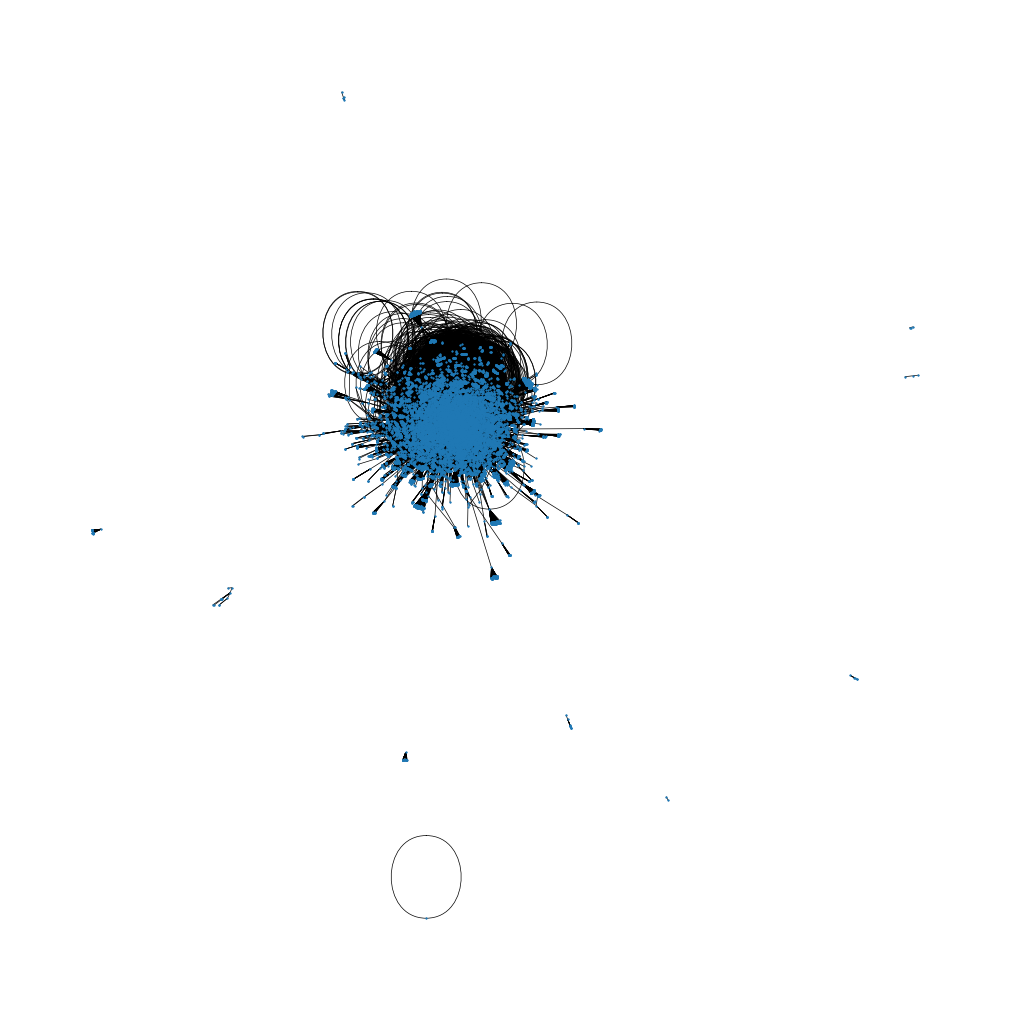

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

for entity in entities:
    G.add_node(entity)
for triplet in triplets:
    G.add_edge(triplet[0], triplet[2], label=triplet[1])

fig = plt.figure(1, figsize=(20, 20), dpi=50)

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [6]:
import random


# shuffle the nodes randomly
nodes = list(G.nodes())
random.shuffle(nodes)

# split the nodes into two sets of approximately 64% and 36%
n = len(nodes)
m = int(n * 0.64)
nodes1 = set(nodes[:m])
nodes2 = set(nodes[m:])

# create subgraphs from the two sets of nodes
G1 = G.subgraph(nodes1)
G2 = G.subgraph(nodes2)

# print the sizes of the subgraphs
print(len(G1), len(G2))

10660 5997


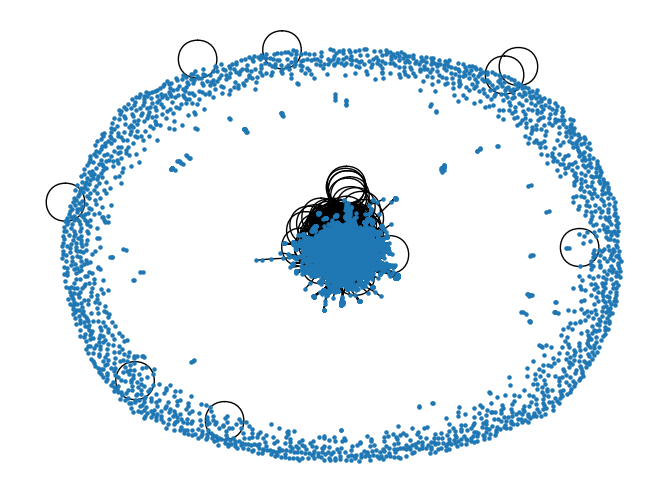

In [7]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G1, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

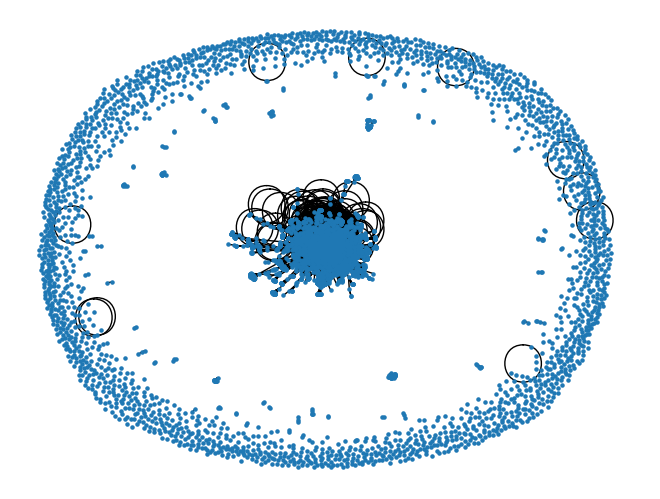

In [8]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G2, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [9]:
len(list(G1.edges(data=True)))

23203

In [10]:
len(list(G2.edges(data=True)))

6812

In [11]:
entities = list(set(df['dm']) | set(df['um']))
len(entities)

16657

In [12]:
relations = set(df['rpctype'])
len(relations)

6

In [13]:
G1_list = list(G1.nodes())
G2_list = list(G2.nodes())

Check that there are no overlapping nodes

In [14]:
assert len(set(G1_list) & set(G2_list)) == 0

In [15]:
transductive = df[(df['um'].isin(G1_list)) & (df['dm'].isin(G1_list))]
transductive

,um,rpctype,dm
3,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
8,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
9,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
10,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
21,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
...,...,...,...
55557,eb7ce54148779f812f2c7f07f18ef4ed269043b9f6b959...,db,db984ae0fed93d22fbcca65eb1ec1b25b4faa71167c580...
55558,24601dd8b36f856eb0a4d759866f475bc62cf843ffe092...,rpc,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...
55559,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...,db,1ac258b5230c8d9dfb28dcad1ced301a9b475b58b37025...
55560,5d887bdb9fd24cea365fb7ce018526df1d39b11630081b...,db,8ee7c139f721a23915ca012d2518eddbdc7ad1ced8b3da...


In [16]:
inductive = df[(df['um'].isin(G2_list)) & (df['dm'].isin(G2_list))]
inductive

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
13,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,14261188e152eee7862ecf8c1fde36129809a29c955020...
15,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,de6d543c40695b95f303d7134b72e73fffec5e582f919e...
16,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,ad6ffa51bfe6955b261932ddf48cacb246b314cf083a48...
...,...,...,...
55472,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...,rpc,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...
55489,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,76f6014fb662c0ae61081c0a5a27745efd75fbff8bf0b4...
55490,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,894e99632107715b0ea6d5580777d9e34b40ff0baf0c65...
55491,b8235e9013d45734b2bb67d8715f2b509cc1f8fb9421a3...,db,8a5b8550301f62d3f32e300dabf37f05b69c50b59b0099...


Check that the remaining values are correct

In [17]:
assert len(transductive) == len(pd.merge(transductive,df))

In [18]:
assert len(inductive) == len(pd.merge(inductive,df))

In [19]:
train_df = transductive
train_df

,um,rpctype,dm
3,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
8,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
9,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
10,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
21,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
...,...,...,...
55557,eb7ce54148779f812f2c7f07f18ef4ed269043b9f6b959...,db,db984ae0fed93d22fbcca65eb1ec1b25b4faa71167c580...
55558,24601dd8b36f856eb0a4d759866f475bc62cf843ffe092...,rpc,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...
55559,1224ab4a5244545b7333a290aaccc95e49f2a793457d21...,db,1ac258b5230c8d9dfb28dcad1ced301a9b475b58b37025...
55560,5d887bdb9fd24cea365fb7ce018526df1d39b11630081b...,db,8ee7c139f721a23915ca012d2518eddbdc7ad1ced8b3da...


In [20]:
len(set(inductive['dm']) | set(inductive['um']))

3745

In [21]:
inductive

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
13,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,14261188e152eee7862ecf8c1fde36129809a29c955020...
15,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,de6d543c40695b95f303d7134b72e73fffec5e582f919e...
16,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,ad6ffa51bfe6955b261932ddf48cacb246b314cf083a48...
...,...,...,...
55472,6fbcbf605f7ae59d3c7efd909466c05f0fb2388c14e109...,rpc,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...
55489,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,76f6014fb662c0ae61081c0a5a27745efd75fbff8bf0b4...
55490,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,894e99632107715b0ea6d5580777d9e34b40ff0baf0c65...
55491,b8235e9013d45734b2bb67d8715f2b509cc1f8fb9421a3...,db,8a5b8550301f62d3f32e300dabf37f05b69c50b59b0099...


In [22]:
validation_df = inductive.sample(frac=0.44, random_state=seed)  # random sample
validation_df

,um,rpctype,dm
36790,05ad163aa35b27070e330f97306a4bd1eaa00be7fc7b6b...,mc,084e84b12d926a8660c132ee79740313111f474f4f0b6b...
18190,5ba2be786dc249dc3b3cda596a4d121f55a1dcb75b399d...,rpc,3cab0a98767379fbcd059750c07ec42dbd0374cb114e0f...
37312,0112c2bb3225e7ee61ff50ef0725282464270b8858ba7d...,mc,ea11651ac4595d18a0a5d1c7bfd8bd1c9da6475ef9e384...
3681,e173e3406814afb878216f53b36db52599b0021b527638...,mc,a83ffb45073828279d30e65e702948fdc7e54f7137d9e6...
32237,095567b4cf2b05052b942e230910f689b43502e9a170cd...,rpc,a5a8108c6658190d6c7aeb0b656f0bb826baf880281dd1...
...,...,...,...
24782,d4ed91dc12f98180f01755ea1572934f291bd6e68e10c6...,mq,d9d038fd615d4381e5c55b813f328e9e7dd4f9e6137328...
6473,da5ac969e69381adca65851753b9ed2decfe4509420484...,mq,96009e8c5c0c4d45466b23f7ad9ba38c92ed823677af0f...
37968,35c56101f54b77bf06b6ba688e09f401e13c906576fd7b...,db,9350710b87e685f73fd274b581f792b2338ff1a74f53ee...
7163,7634eabb934a9c9504b24483344242f6e060f8599aa48d...,mq,73257ee66fbea0ea8b789e1027396c9292d7140b6d5937...


In [23]:
test_df = inductive.drop(validation_df.index)  # drop the sampled rows to get the second DataFram
test_df

,um,rpctype,dm
2,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
13,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,14261188e152eee7862ecf8c1fde36129809a29c955020...
15,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,de6d543c40695b95f303d7134b72e73fffec5e582f919e...
16,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,ad6ffa51bfe6955b261932ddf48cacb246b314cf083a48...
24,4ab265f54516248ee8873be7d6441912456ce17e84f399...,userDefined,4ab265f54516248ee8873be7d6441912456ce17e84f399...
...,...,...,...
55458,e36bb1e19c930ee1e624e55a4258fc1421a643e63529b9...,rpc,e36bb1e19c930ee1e624e55a4258fc1421a643e63529b9...
55471,856af0816af9ddb8bb358a6448f19d434e20d973a34ea4...,rpc,d2c895bd5c7de55f381310fd1b94ce9d518bf4ac22e22f...
55489,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,76f6014fb662c0ae61081c0a5a27745efd75fbff8bf0b4...
55490,721e3e82ecb47801348ab69d44d901c9ac0d3e0859c643...,mc,894e99632107715b0ea6d5580777d9e34b40ff0baf0c65...


In [24]:
len(set(train_df['dm']) | set(train_df['um']))

8690

In [25]:
len(set(validation_df['dm']) | set(validation_df['um']))

2313

In [26]:
len(set(test_df['dm']) | set(test_df['um']))

2685

Check to see if there is test leakage

In [27]:
assert(len(pd.merge(train_df, validation_df))==0)

In [28]:
assert(len(pd.merge(test_df, validation_df))==0)

In [29]:
assert(len(pd.merge(train_df, test_df))==0)

In [30]:
assert(len(pd.merge(train_df, inductive))==0)

Check that all relations are present in the train set

In [31]:
assert(len(set(df['rpctype'])) == len(set(train_df['rpctype'])))

Check that there is no entities test leakage

In [32]:
train_entities = set(train_df['dm']) | set(train_df['um'])
assert(len(train_entities & (set(validation_df['dm']) | set(validation_df['um'])))==0)

In [33]:
assert(len(train_entities & (set(inductive['dm']) | set(inductive['um'])))==0)

In [34]:
assert(len(train_entities & (set(test_df['dm']) | set(test_df['um'])))==0)

In [35]:
test_df[(test_df['dm'].isin(train_entities)) | (test_df['um'].isin(train_entities))]

,um,rpctype,dm


In [36]:
inductive[(inductive['dm'].isin(train_entities)) | (inductive['um'].isin(train_entities))]

,um,rpctype,dm


In [34]:
def create_triplets(df):
    triplets = []
    for i in range(len(df)):
        head = df.iloc[i]['dm']
        tail = df.iloc[i]['um']
        rel = df.iloc[i]['rpctype']
        triplets.append([head,rel,tail])
    return triplets

In [35]:
import asposecells
import jpype
jpype.startJVM()

from asposecells.api import Workbook, FileFormatType

def create_tsv(triplets, file_name):


    # Create Workbook object.
    workbook = Workbook(FileFormatType.TSV)

    # Access the first worksheet of the workbook.
    worksheet = workbook.getWorksheets().get(0)

    # Get the desired cell(s) of the worksheet and input the value into the cell(s).


    i = 1
    for elem in triplets: 
        worksheet.getCells().get("A"+str(i)).putValue(elem[0])
        worksheet.getCells().get("B"+str(i)).putValue(elem[1])
        worksheet.getCells().get("C"+str(i)).putValue(elem[2])
        i+=1


    # Save the workbook as TSV file.
    workbook.save(file_name)


    file = open(file_name,'r')  
    lines = file.readlines()  
    file.close()
    file = open(file_name,'w')  
    lines = lines[:-1]
    file.writelines(lines)
    file.close()

In [36]:
datasets = [train_df, validation_df, test_df,inductive]
names = ["train", "validation","test","inference"]

In [37]:
for elem in zip(datasets,names):
    create_tsv(create_triplets(elem[0]),f"MSCallGraph_{elem[1]}_fully_inductive.tsv")
jpype.shutdownJVM()